# **MODELOS DE SÉRIES TEMPORAIS PARA ELETRICIDADE GERADA NOS EUA POR SETOR**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4

## **Tratamento da base de dados**

O conjunto de dados abrange dados mensais de geração de eletricidade abrangendo de janeiro de 2001 a setembro de 2023.

In [2]:
eletricidade = pd.read_csv('eletricity_generated.csv')

Boas Práticas para análise de dados:

*  Analisar as variaveis do dataframe importado;
*  Verificar o tamanho dataframe;
*  Verificar como o python reconhece as variáveis;
*  Verificar a existência de valores faltantes.

In [3]:
eletricidade.head()

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,Sep-23,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,Aug-23,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,Jul-23,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,Jun-23,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,May-23,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


Possiveis problemas : virgulas e traços (valores nao preenchidos)

Verificando o tamanho da nossa base de dados

In [4]:
eletricidade.shape

(273, 8)

Análise dos tipos de atributos.
*   object: strings
*   int64: inteiros
*   float64: reais
*   complex: complexos

In [5]:
eletricidade.dtypes

Month                                                 object
all fuels (utility-scale) thousand megawatthours     float64
coal thousand megawatthours                          float64
natural gas thousand megawatthours                   float64
nuclear thousand megawatthours                       float64
conventional hydroelectric thousand megawatthours    float64
wind thousand megawatthours                          float64
all solar thousand megawatthours                     float64
dtype: object

Temos todas as variáveis números reais

In [6]:
print(eletricidade)

      Month  all fuels (utility-scale) thousand megawatthours  \
0    Sep-23                                       358136.2599   
1    Aug-23                                       423934.2574   
2    Jul-23                                       425611.3284   
3    Jun-23                                       356672.3849   
4    May-23                                       327532.6236   
..      ...                                               ...   
268  May-01                                       300491.6210   
269  Apr-01                                       278078.8710   
270  Mar-01                                       300706.5440   
271  Feb-01                                       282940.1980   
272  Jan-01                                       332493.1600   

     coal thousand megawatthours  natural gas thousand megawatthours  \
0                    60005.67580                         164466.3568   
1                    78184.50094                         199993.0422   
2  

In [7]:
eletricidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Month                                              273 non-null    object 
 1   all fuels (utility-scale) thousand megawatthours   273 non-null    float64
 2   coal thousand megawatthours                        273 non-null    float64
 3   natural gas thousand megawatthours                 273 non-null    float64
 4   nuclear thousand megawatthours                     273 non-null    float64
 5   conventional hydroelectric thousand megawatthours  273 non-null    float64
 6   wind thousand megawatthours                        273 non-null    float64
 7   all solar thousand megawatthours                   117 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.2+ KB


# Geração de energia por combustível

Temos dados sobre vários tipos de geração de energia dos EUA, neste caso pegamos a energia gerada através de combustíveis

In [8]:
eletricidade_combustivel = eletricidade.copy()[['Month', 'all fuels (utility-scale) thousand megawatthours']]
eletricidade_combustivel.columns = ['mes', 'combustiveis']

In [9]:
eletricidade_combustivel.dtypes

mes              object
combustiveis    float64
dtype: object

In [10]:
eletricidade_combustivel.head()

,mes,combustiveis
0,Sep-23,358136.2599
1,Aug-23,423934.2574
2,Jul-23,425611.3284
3,Jun-23,356672.3849
4,May-23,327532.6236


Teremos que formatar a tabela para criar nossa série temporal

Percebemos que os dados estão invertidos, os primeiros são os mais novos e os últimos os mais antigos, portanto iremos inverter

In [11]:
mesInvertido = eletricidade_combustivel['mes'][::-1]
combustivelInvertido = eletricidade_combustivel['combustiveis'][::-1]
eletricidade_ordenada = pd.DataFrame(data=[mesInvertido, combustivelInvertido]).T
eletricidade_ordenada.head()

,mes,combustiveis
272,Jan-01,332493.16
271,Feb-01,282940.198
270,Mar-01,300706.544
269,Apr-01,278078.871
268,May-01,300491.621


In [12]:
eletricidade2 = eletricidade_ordenada.drop(columns='mes')
eletricidade2.head()

,combustiveis
272,332493.16
271,282940.198
270,300706.544
269,278078.871
268,300491.621


Temos que configurar a tabela de maneira a ordenar os registros por linha

Transformar em Array resolveria o problema?

In [13]:
eletricidade3 = eletricidade2.values
eletricidade3

array([[332493.16],
       [282940.198],
       [300706.544],
       [278078.871],
       [300491.621],
       [327693.978],
       [357613.7],
       [370532.828],
       [306928.866],
       [294733.613],
       [278933.942],
       [305496.328],
       [319941.476],
       [281825.712],
       [302549.011],
       [289848.253],
       [307674.569],
       [341023.144],
       [381542.107],
       [374585.819],
       [331279.434],
       [307059.46],
       [296289.561],
       [324833.705],
       [341988.901],
       [299248.777],
       [304317.265],
       [285755.699],
       [307544.887],
       [328693.698],
       [374396.05],
       [381816.319],
       [323135.534],
       [306740.933],
       [297866.711],
       [331680.43],
       [346545.627],
       [314279.9095],
       [308812.0955],
       [290559.9142],
       [327380.2636],
       [345085.0788],
       [377331.6971],
       [368439.0371],
       [335622.1979],
       [312450.2229],
       [302101.2562],
       [3

Teriamos vários vetores por conta da quebra de linhas

Transformando em uma lista sem quebras


In [14]:
eletricidade4 = list(eletricidade3.flatten())
print(eletricidade4)

[332493.16, 282940.198, 300706.544, 278078.871, 300491.621, 327693.978, 357613.7, 370532.828, 306928.866, 294733.613, 278933.942, 305496.328, 319941.476, 281825.712, 302549.011, 289848.253, 307674.569, 341023.144, 381542.107, 374585.819, 331279.434, 307059.46, 296289.561, 324833.705, 341988.901, 299248.777, 304317.265, 285755.699, 307544.887, 328693.698, 374396.05, 381816.319, 323135.534, 306740.933, 297866.711, 331680.43, 346545.627, 314279.9095, 308812.0955, 290559.9142, 327380.2636, 345085.0788, 377331.6971, 368439.0371, 335622.1979, 312450.2229, 302101.2562, 341947.9634, 343121.4534, 298500.3156, 317458.2765, 289562.3999, 315062.1099, 363671.636, 402273.8465, 404940.6811, 350217.8005, 316397.9236, 306115.2362, 348101.0706, 328657.7385, 307333.43, 318729.7996, 297858.0775, 330615.57, 364259.7976, 410420.7933, 407762.5364, 332055.3208, 321567.0913, 309158.8264, 336283.2459, 353531.0948, 323230.3948, 320471.2425, 303129.0636, 330202.758, 362754.8772, 393226.4323, 421796.6593, 355393.9

Transformar em lista sem quebra, por isso utilizamos o comando .flatten()

Criando um range de datas, mensalmente a partir de 2001, e a partir da quantidade de registros na lista temperaturas4

In [15]:
indice = pd.date_range('2001', periods = len(eletricidade4), freq = 'M')
indice

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30'],
              dtype='datetime64[ns]', length=273, freq='M')

Criando a série temporal

In [16]:
serie = pd.Series(eletricidade4, index = indice)
serie

2001-01-31    332493.1600
2001-02-28    282940.1980
2001-03-31    300706.5440
2001-04-30    278078.8710
2001-05-31    300491.6210
                 ...     
2023-05-31    327532.6236
2023-06-30    356672.3849
2023-07-31    425611.3284
2023-08-31    423934.2574
2023-09-30    358136.2599
Freq: M, Length: 273, dtype: float64

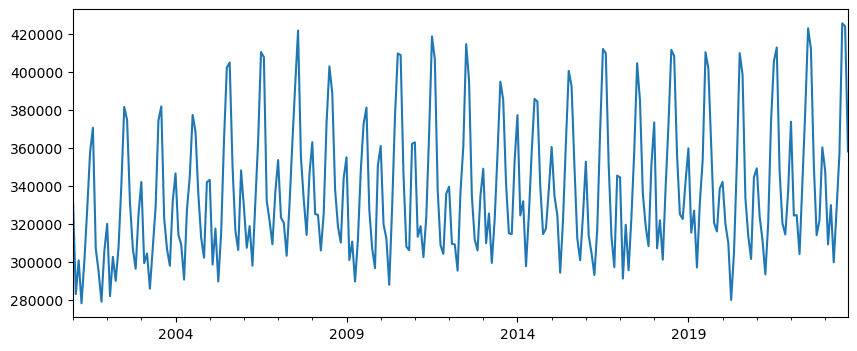

In [17]:
serie.plot()
plt.show()

Análise e preparação da Série Temporal

Analisando a tendência

Calculando a média móvel para suavização da série.

*   Utilizando janela de 12 meses
*   Retiramos a média dessa janela


In [18]:
media_movel = serie.rolling(window=12)
media_movel = media_movel.mean()

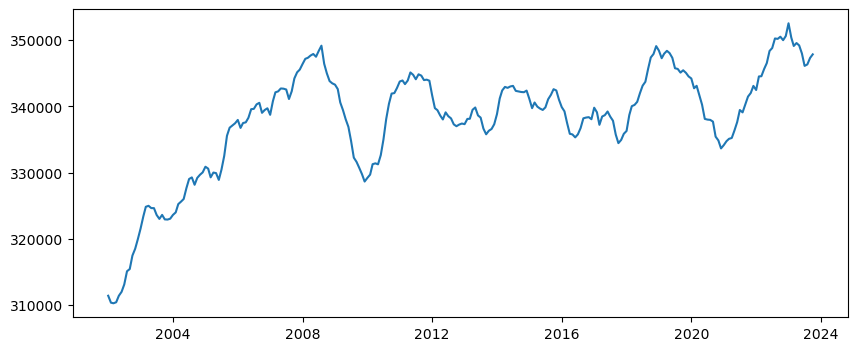

In [19]:
plt.plot(media_movel);

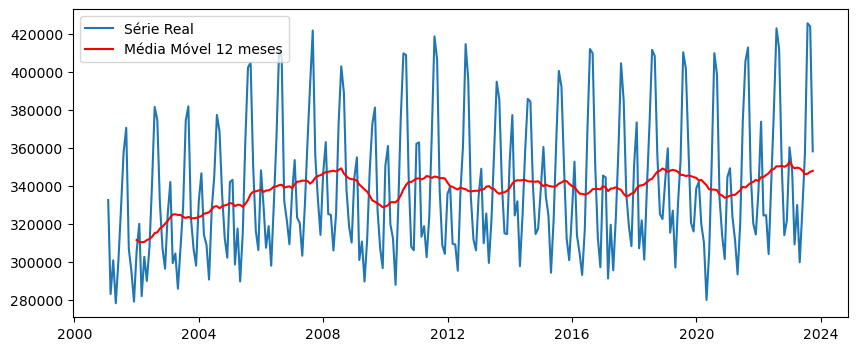

In [20]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel,color='red', label='Média Móvel 12 meses')
plt.legend(loc='best')
plt.show()

Existe oscilação na média móvel, porém pouco mais suave do que da série real.  (redução de amplitude)

A média movel facilita na verificação da existencia de tendência de crescimento ou decrescimento da série.

Podemos aumentar a janela da média móvel para verificar mais claramente a ausência do fator de tendência

**Decomposição**

Iremos realizar a decomposição da série para analisarmos a tendencia, sazonalidade e resíduos

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
decomposicao = seasonal_decompose(serie)

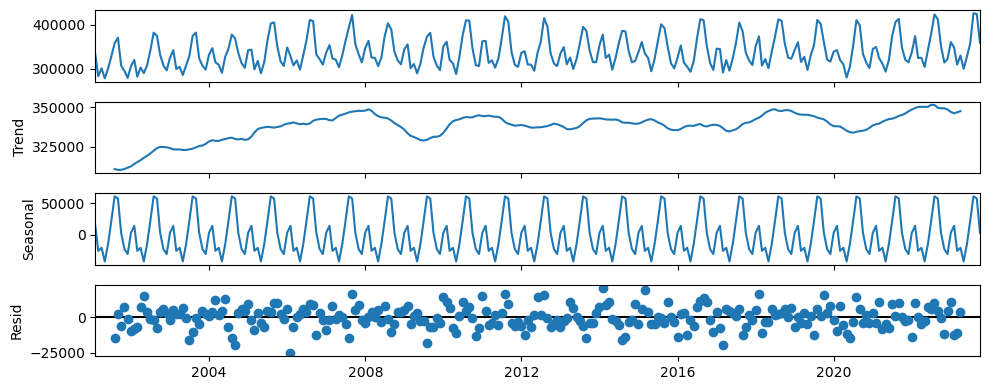

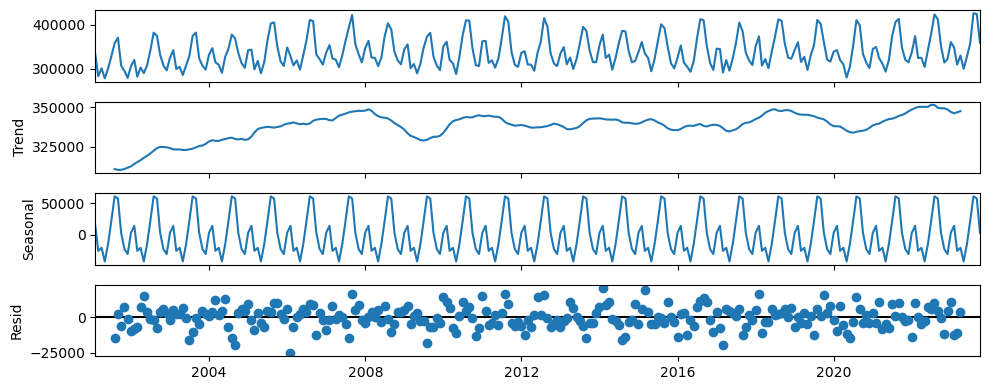

In [23]:
decomposicao.plot()

No primeiro gráfico temos a série temporal real.

No segundo a tendencia, que evidencia um pouco de tendência crescente, mas não muito. Existe uma oscilação porém não é possível identificar um ciclo bem definido.

No terceiro a sazonalidade forte e constante , os picos não aumentam nem diminuem, eles se matem constantes ao longo da série, e com intervalos bem definidos, mas também com subpicos

E no quarto gráfico podemos observar os resíduos que estão aparentemente aleatórios em torno de zero.

Análise de resíduos é muito importante pois ela que nos mostram a qualidade do nosso modelo, como verememos mais a frente.

### **Normalidade e Transformação**

In [24]:
import scipy.stats as stats

Verificando a normalidade dos dados da série

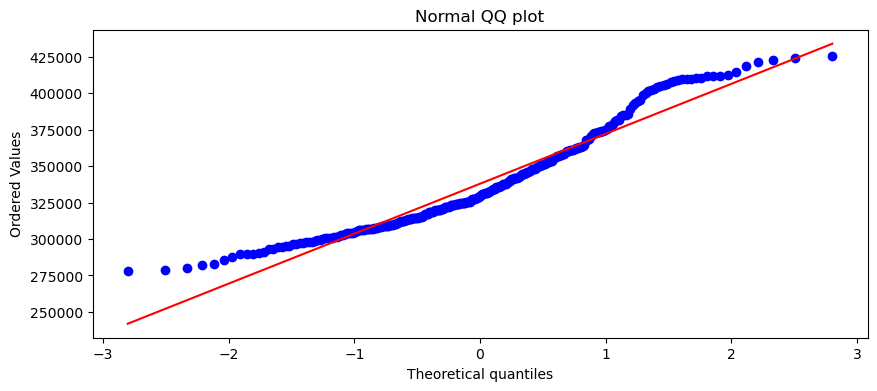

In [25]:
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Podemos verificar que os dados não se aproximam de uma distribuição normal, apenas alguns pontos estão proximos da linha de referencia.
E alguns pontos principalmente no início e fim da série estão bem distantes da linha de referência.

Fazendo o teste de Sahpiro-Wilk para confirmar a ausência de normalidade

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [26]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9411163926124573
p-valor: 5.479231734994983e-09


Vamos tentar aproximar de uma distribuição normal

Inicialmente iremos realizar uma tranformação Transformação por log, buscando diminuir variância e melhorar normalidade.

In [27]:
serie2 = np.log(serie)
serie2

2001-01-31    12.714375
2001-02-28    12.552991
2001-03-31    12.613890
2001-04-30    12.535660
2001-05-31    12.613175
                ...    
2023-05-31    12.699343
2023-06-30    12.784573
2023-07-31    12.961282
2023-08-31    12.957334
2023-09-30    12.788669
Freq: M, Length: 273, dtype: float64

In [28]:
e, p = stats.shapiro(serie2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9587796926498413
p-valor: 5.254486268313485e-07


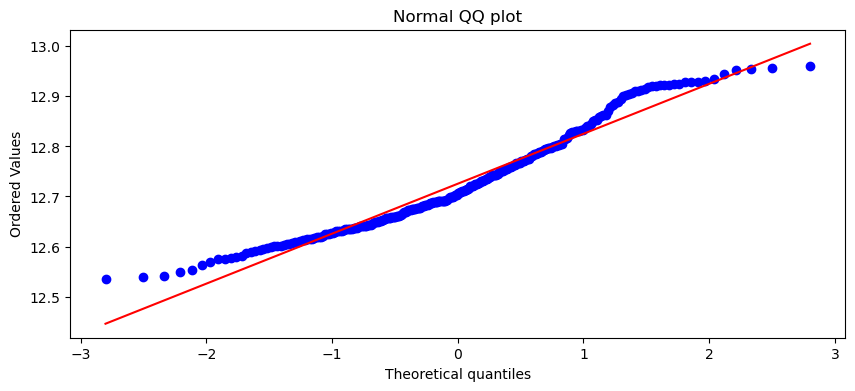

In [29]:
stats.probplot(serie2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

A função logarítimica não apresentou erro, portanto seguiremos com ela, já que não possuimos valores zeros ou negativos.

Observamos uma melhora, em relação ao ajuste dos dados, porém ainda temos muitos pontos distantes da linha de referencia, o que possivelmente resultará em uma série que ainda não é aproximadamente normal.

Fazendo o teste de hipótese para verificar se os dados seguem uma distribuição normal.

Ainda não temos uma série normal.

C:\Users\lucas\AppData\Local\Temp\ipykernel_13980\3051758847.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie);
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


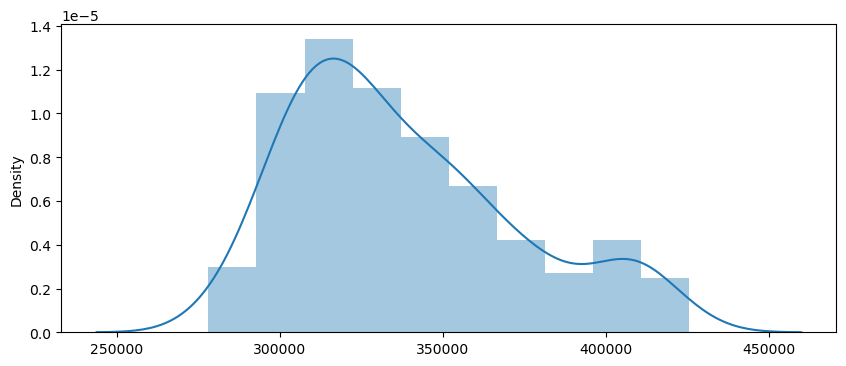

In [30]:
import seaborn as sns
sns.distplot(serie);

C:\Users\lucas\AppData\Local\Temp\ipykernel_13980\1113069810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie2);
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


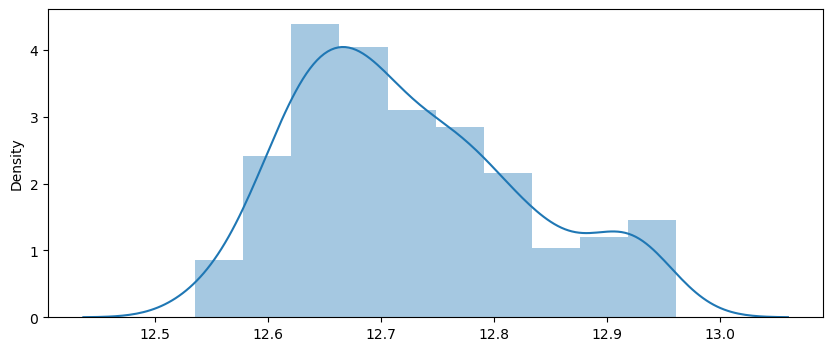

In [31]:
sns.distplot(serie2);

Observamos que a série melhora sua disposição, e se aproxima mais da normalidade.

Sempre temos que buscar uma série que aproxima de uma distribuição normal para termos modelos melhores.

Não é recomendado ficar tentando transformações sobrepostas para obter a normalidade.

### **Estacionaridade**

Média e variância constantes independente do tempo que a série é observada.

In [32]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ha = não é estacionário: estatística do teste > valor crítico

Ho = é estacionário:  estatística do teste < valor crítico

In [33]:
kpss = statsmodels.tsa.stattools.kpss(serie2)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.7913
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\lucas\AppData\Local\Temp\ipykernel_13980\345311081.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie2)


### **Autocorrelação**

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

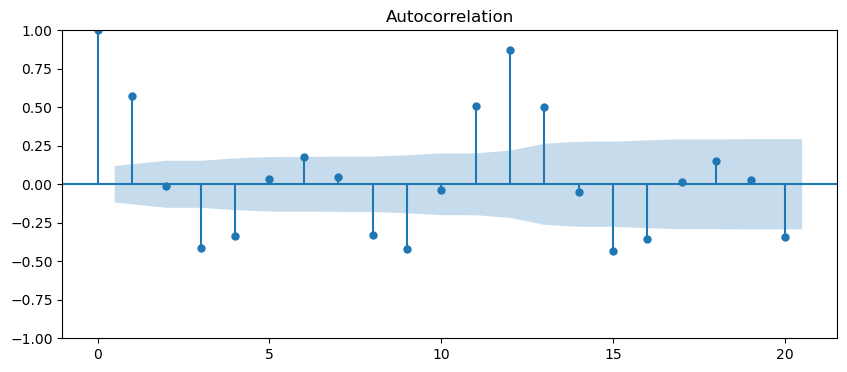

In [35]:
plot_acf(serie2, lags=20)
plt.show()

ACF - Autocorrelação de valores vizinhos

O gráfico indica que temos autocorrelação, entre os valores da própria série, e ainda mostra uma forte sazonalidade.

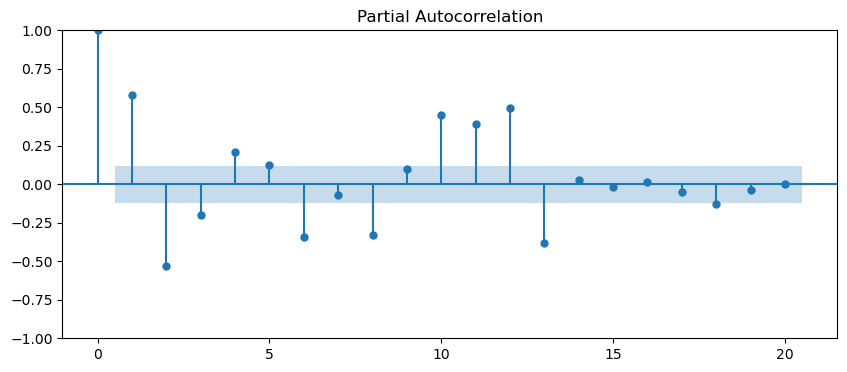

In [36]:
plot_pacf(serie, lags=20)
plt.show()

PACF - correlação entre valores intercalados - autocorrelação Parcial

Temos muitos valores que ultrapassam o intvalo, logo os dados são autocorrelacionados quando analisamos os valores intercalados.


A série é autocorrelacionada, mas não tem problema, pois esse é um pressuposto da análise de modelos de séries temporais.

Logo temos uma série autocorrelacionada, e estacionária, porém seus dados não são normais

## **Modelo AR**

Modelo AR - Modelo Autoregressivo

Modelo ARIMA:(p,d,q)

*   p: ordem da autoregressão
*   d: grau de diferenciação (para transformar em estacionario)
*   q: Ordem de média móvel dos reísduos

Obs: cuidado para nao confundir a Média móvel que iremos analisar não é a média móvel que construímos para suavizar a tendência.
Essa média móvel está relacionada a combinação linear dos erros de valores passados

Modelo ar: (p,0,0)

Só colocamos valores numéricos para a ordem de autoregressão

In [37]:
from statsmodels.tsa.arima.model import ARIMA

Criando o Modelo AR

In [38]:
modelo_ar = ARIMA(serie2, order = (1,0,0))

Temos que analisar o modelo

In [39]:
resultado = modelo_ar.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  273
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 293.313
Date:                Wed, 03 Jan 2024   AIC                           -580.626
Time:                        15:26:28   BIC                           -569.798
Sample:                    01-31-2001   HQIC                          -576.279
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7257      0.012   1045.277      0.000      12.702      12.750
ar.L1          0.5723      0.057     10.102      0.000       0.461       0.683
sigma2         0.0068      0.001      7.864      0.0

O AIC é a métrica mais recomendada para avaliar o modelo uma vez que existem alguns modelos que não retornam o BIC.

Obs.: O recomendado é termos valores de AR até 10, pois depois que incluirmos a sazonalidade o processo pode ficar muito demorado, além do tempo computacional aumentar, o modelo geralmente não melhora significativamente após esse valor.

Para identificar o valor que devemos incluir na métrica AR, devemos analisar o gráfico de acf

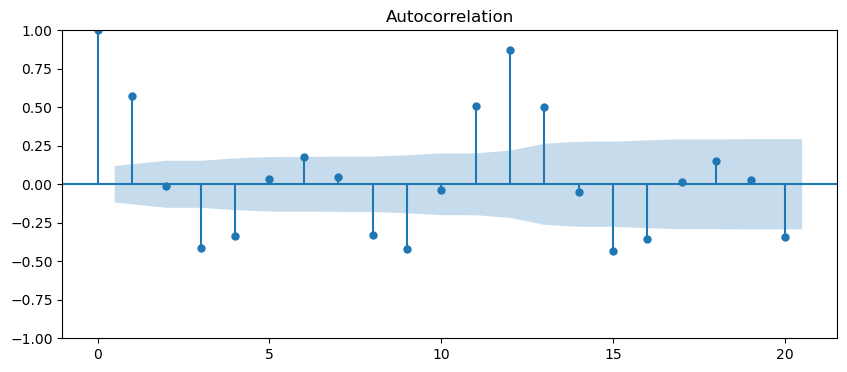

In [40]:
plot_acf(serie2, lags=20)
plt.show()

É interessante analisar os lags que tiveram mudanças bruscas, neste caso o 3 , pois não é correlacionado com o lag 2, o 4 pois "virou" autocorrelacionado, o 9 e 10 pelos mesmo motivos.

In [41]:
modelo_ar3 = ARIMA(serie2, order = (3,0,0))
resultado3 = modelo_ar3.fit()
modelo_ar4 = ARIMA(serie2, order = (4,0,0))
resultado4 = modelo_ar4.fit()
modelo_ar9 = ARIMA(serie2, order = (9,0,0))
resultado9 = modelo_ar9.fit()
modelo_ar10 = ARIMA(serie2, order = (10,0,0))
resultado10 = modelo_ar10.fit()

resultado3.aic

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-674.9367010699657

In [42]:
resultado4.aic

-684.4589211733744

In [43]:
resultado9.aic

-754.8982179569723

In [44]:
resultado10.aic

-811.7255950860385

Modelo Final

In [45]:
modelo_ar = ARIMA(serie2, order = (10,0,0))
resultado = modelo_ar.fit()

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Melhor AIC: -811.7256 = (10,0,0)

### **Análise dos Resíduos**

In [46]:
residuos = resultado.resid
residuos

2001-01-31   -0.010426
2001-02-28   -0.165794
2001-03-31    0.030379
2001-04-30   -0.156423
2001-05-31   -0.051166
                ...   
2023-05-31   -0.019356
2023-06-30   -0.013897
2023-07-31    0.102482
2023-08-31    0.073447
2023-09-30    0.003753
Freq: M, Length: 273, dtype: float64

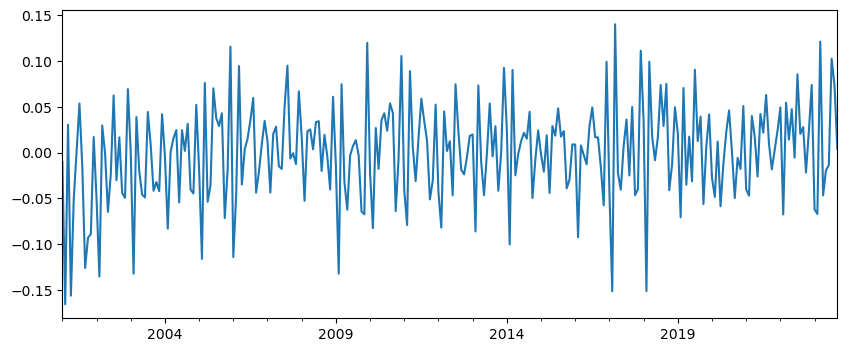

In [47]:
residuos.plot()
plt.show()

Analise no gráfico de resíduos -> média e a variância.

O ideal é que a média seja aproximadamente zero e a variância constante. (ruído branco)

Observa-se que os resíduos tem média zero ao longo da serie.

Já a variância não aparenta ser constante, pois sua amplitude varia.

**Normalidade**

Testando a normalidade dos resíduos

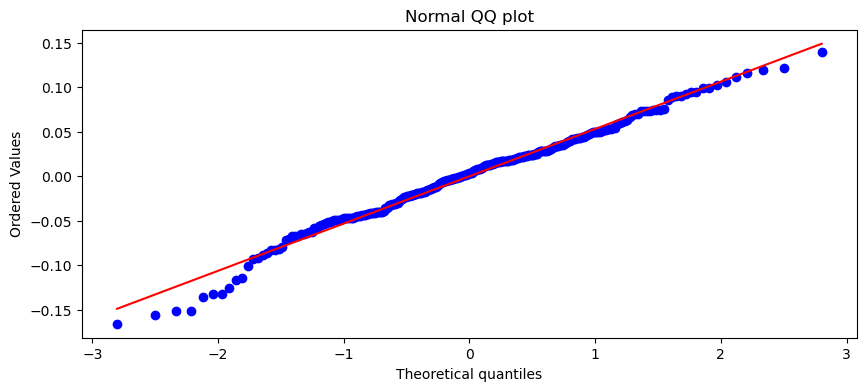

In [48]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Aparentemente não teremos dados normais, observa-se um distanciamento dos pontos em relação a linha de referência no início e fim do grafico.

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [49]:
e, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9875445365905762
p-valor: 0.018515806645154953


Pelo teste de hipótese os dados não são normais

C:\Users\lucas\AppData\Local\Temp\ipykernel_13980\3564404282.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos);
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


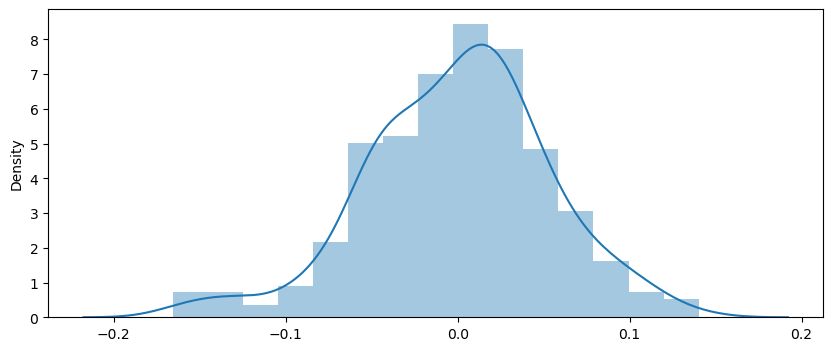

In [50]:
import seaborn as sns
sns.distplot(residuos);

A distribuição se aproxima de uma distribuição normal.

Pela analise de resíduos nosso modelo não ficou "perfeito" e pode apresentar falhas na previsão.

Resultados obtidos até agora em nosso modelo:


*   Distribuição dos resíduos apresenta uma média constante, sem presença de tendencia
*   Dados não normais

Agora vamos analisar a autocorrelação. Neste caso o ideal é que o resíduos NÃO SEJAM autocorrelacionados.



**Autocorrelação**

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

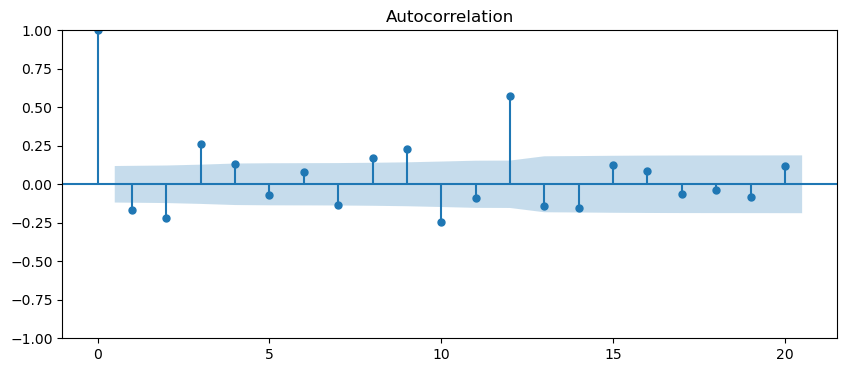

In [52]:
plot_acf(residuos, lags=20)
plt.show()

A grande maioria dos pontos esta dentro do intervalo de confiança, logo os residuos não são autocorrelacionados.

Validando a ausencia da autocorrelação com o pacf

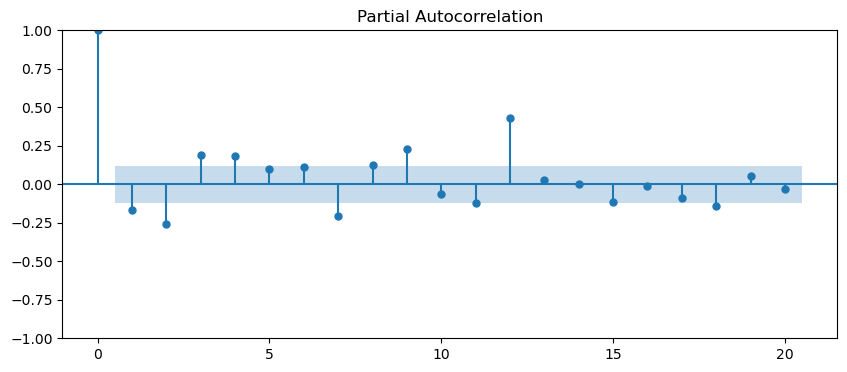

In [53]:
plot_pacf(residuos, lags=20)
plt.show()

A grande maioria dos pontos esta dentro do intervalo de confiança, logo os residuos não são autocorrelacionadas

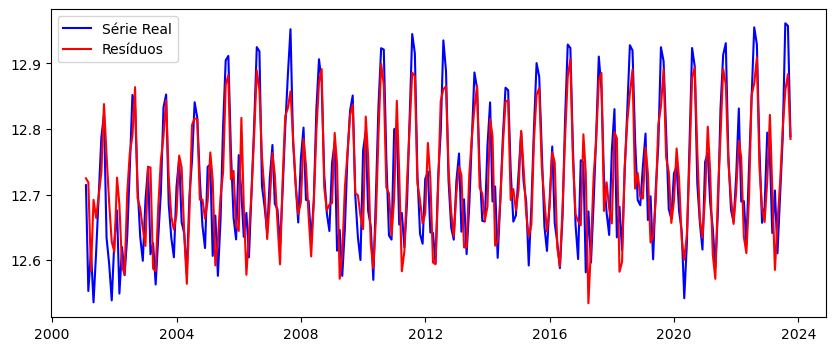

In [54]:
plt.plot(serie2,color='blue', label='Série Real')
plt.plot(serie2-residuos,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Os residuos conseguem seguir bem o padrão de oscilação da serie real

**Previsão**

In [55]:
resultado.fittedvalues

2001-01-31    12.724801
2001-02-28    12.718785
2001-03-31    12.583511
2001-04-30    12.692084
2001-05-31    12.664342
                ...    
2023-05-31    12.718699
2023-06-30    12.798470
2023-07-31    12.858800
2023-08-31    12.883886
2023-09-30    12.784916
Freq: M, Length: 273, dtype: float64

fittedvalues -> mostra os valores que foram ajustados com o modelo

Temos duas formas de fazer previsão: Predict e forecast

O tamanho da nossa série (Length) é 273 , porem o python começa a contabilizar no 0.

In [56]:
previsao = resultado.predict(272, end=284)
previsao

2023-09-30    12.784916
2023-10-31    12.752538
2023-11-30    12.683944
2023-12-31    12.695494
2024-01-31    12.726407
2024-02-29    12.706370
2024-03-31    12.678887
2024-04-30    12.596261
2024-05-31    12.687371
2024-06-30    12.792659
2024-07-31    12.844581
2024-08-31    12.852597
2024-09-30    12.762602
Freq: M, Name: predicted_mean, dtype: float64

In [57]:
previsao2 = resultado.forecast(12)
previsao2

2023-10-31    12.752538
2023-11-30    12.683944
2023-12-31    12.695494
2024-01-31    12.726407
2024-02-29    12.706370
2024-03-31    12.678887
2024-04-30    12.596261
2024-05-31    12.687371
2024-06-30    12.792659
2024-07-31    12.844581
2024-08-31    12.852597
2024-09-30    12.762602
Freq: M, Name: predicted_mean, dtype: float64

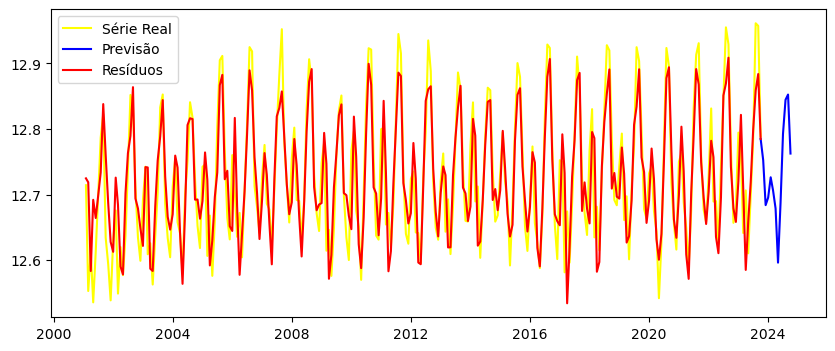

In [58]:
plt.plot(serie2,color='yellow', label='Série Real')
plt.plot(previsao,color='blue', label='Previsão')
plt.plot(serie2-residuos,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Como os dados foram transformados, a escala apresenta no grafico nao é a escala real da série.

Como tinhamos o log da base, agora faremos o exponencial

In [59]:
prev_escala = pd.DataFrame(np.exp(previsao))
prev_escala

,predicted_mean
2023-09-30,356794.642603
2023-10-31,345427.404487
2023-11-30,322527.449254
2023-12-31,326274.521778
2024-01-31,336517.915767
2024-02-29,329842.458531
2024-03-31,320900.649799
2024-04-30,295451.733765
2024-05-31,323634.802990
2024-06-30,359567.998273


Plotando os valores reais

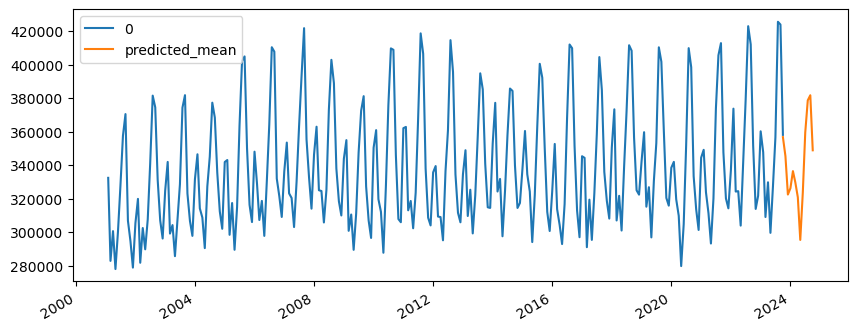

In [60]:
pd.concat([serie,prev_escala]).plot();

## **Modelo MA**

Modelo de Média Móvel - Está relacionado ao erro de regressão. Ele faz uma relação linear dos erros anteriores, erros passados.

Esta média móvel é diferente da realizada anteriormente para analisar as tendencias.

Modelo arima:(p,d,q)



*   p: ordem da autoregressão
*   d: grau de diferenciação (para transformar em estacionario)
*   q: Ordem de média móvel dos resíduos


Modelo MA: (0,0,q)

Existe uma limitação sugerida de chegarmos até aproximadamente 10 na escolha da ordem da média movel

In [61]:
from statsmodels.tsa.arima.model import ARIMA

Criando o modelo MA

In [62]:
modelo_ma1 = ARIMA(serie2, order = (0,0,1))
resultado1 = modelo_ma1.fit()

modelo_ma2 = ARIMA(serie2, order = (0,0,2))
resultado2 = modelo_ma2.fit()

modelo_ma3 = ARIMA(serie2, order = (0,0,3))
resultado3 = modelo_ma3.fit()

modelo_ma4 = ARIMA(serie2, order = (0,0,4))
resultado4 = modelo_ma4.fit()

modelo_ma5 = ARIMA(serie2, order = (0,0,5))
resultado5 = modelo_ma5.fit()

modelo_ma6 = ARIMA(serie2, order = (0,0,6))
resultado6 = modelo_ma6.fit()

modelo_ma7 = ARIMA(serie2, order = (0,0,7))
resultado7 = modelo_ma7.fit()

modelo_ma8 = ARIMA(serie2, order = (0,0,8))
resultado8 = modelo_ma8.fit()

modelo_ma9 = ARIMA(serie2, order = (0,0,9))
resultado9 = modelo_ma9.fit()

modelo_ma10 = ARIMA(serie2, order = (0,0,10))
resultado10 = modelo_ma10.fit()
resultado1.aic

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-601.9225685437324

In [63]:
resultado2.aic

-650.2162817697438

In [64]:
resultado3.aic

-658.2758542925192

In [65]:
resultado4.aic

-684.809887558867

In [66]:
resultado5.aic

-693.5125596274147

In [67]:
resultado6.aic

-692.5568048412197

In [68]:
resultado7.aic

-697.4018233404506

In [69]:
resultado8.aic

-697.980789257876

In [70]:
resultado9.aic

-720.2952877932948

In [71]:
resultado10.aic

-705.8818314975886

Para o modelo de MA, podemos testar os 10 valores para selecionar o modelo que tem o menor AIC.

In [72]:
resultado_ma = modelo_ma9.fit()
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  273
Model:                 ARIMA(0, 0, 9)   Log Likelihood                 371.148
Date:                Wed, 03 Jan 2024   AIC                           -720.295
Time:                        15:26:38   BIC                           -680.591
Sample:                    01-31-2001   HQIC                          -704.357
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7252      0.007   1846.241      0.000      12.712      12.739
ma.L1          0.8901      0.054     16.394      0.000       0.784       0.997
ma.L2          0.3111      0.074      4.218      0.0

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Melhor AIC: -811.726 = (10,0,0)

Modelo MA: AIC = -720.295 (0,0,9)

### **Análise dos Resíduos**

Fazendo a analise de resíduos para o modelo que tem o melhor AIC.

Lembrando que o ideal é que os resíduos tenha media zero e variancia contante ao longo da série. (Ruído Branco)

In [73]:
residuos_ma = resultado_ma.resid

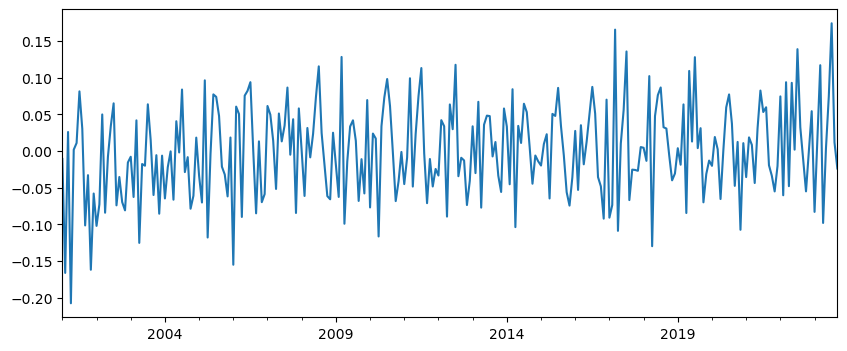

In [74]:
residuos_ma.plot()
plt.show()

Existem muitos picos, principalmente na parte inferiror, mas no geral temos uma média aparentemente constate em torno de zero.

**Normalidade**

Analisando a Normalidade dos resíduos

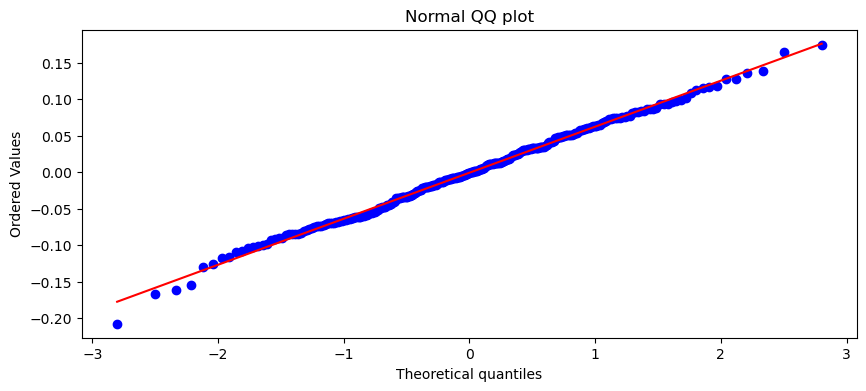

In [75]:
stats.probplot(residuos_ma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Observamos que os pontos iniciais se distanciam da reta de referencia. Aparentemente não teremos uma distribuição normal.

Realizando o teste de hipótese de Shapiro Wilk

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [76]:
e, p = stats.shapiro(residuos_ma)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.996847927570343
p-valor: 0.8697838187217712


Temos que p-valor é > que 0,05 por tanto nossa distribuição é normal

C:\Users\lucas\AppData\Local\Temp\ipykernel_13980\2416477228.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos_ma);
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


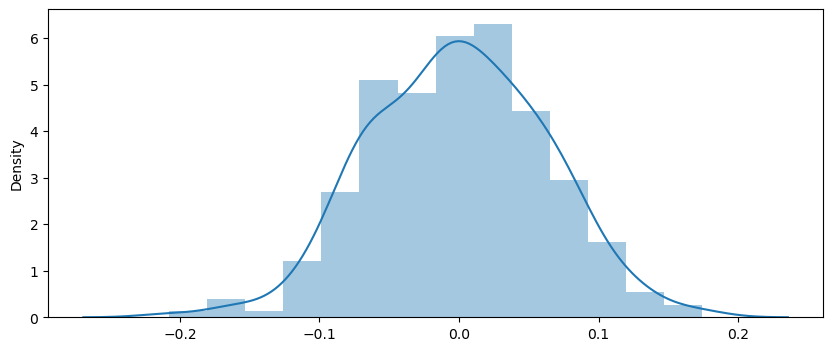

In [77]:
import seaborn as sns
sns.distplot(residuos_ma);

No histograma observamos uma assimetria e alguns picos que podems estar atrapalhando a normalidade dos resíduos

**Autocorrelação**

Verificando a autocorrelação dos resíduos

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

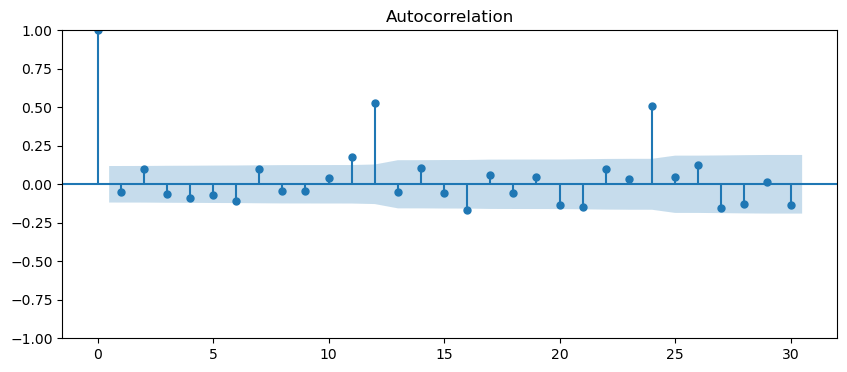

In [79]:
plot_acf(residuos_ma, lags=30)
plt.show()

Podemos verificar que existem muitos pontos fora do intervalo de confiança, apontando que existe uma autocorrelação.

O mesmo observamos na autocorrelação parcial, onde temos muitos pontos fora do intervalo de confiança, apontando que axite uma autocorrelação.

Para o modelo MA temos que os resíduos:

*   Variância não constante
*   São normais
*   Estão autocorrelacionados

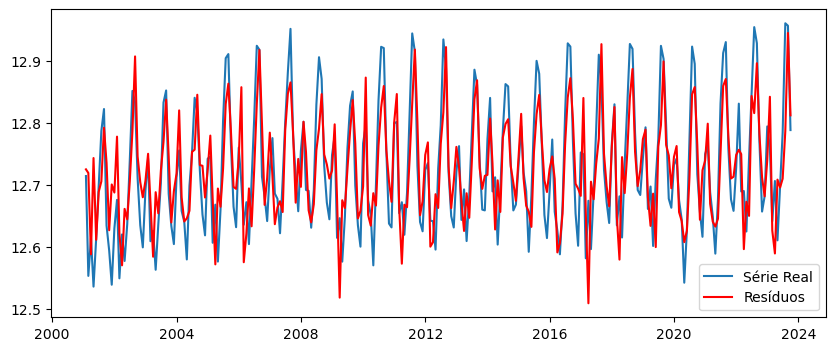

In [80]:
plt.plot(serie2, label='Série Real')
plt.plot(serie2-residuos_ma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Observa-se uma coincidencia da foram em que os resíduos está oscilando versus o real.

**Previsão**

In [81]:
resultado_ma.fittedvalues

2001-01-31    12.725204
2001-02-28    12.719358
2001-03-31    12.587926
2001-04-30    12.743472
2001-05-31    12.611323
                ...    
2023-05-31    12.695956
2023-06-30    12.710125
2023-07-31    12.786932
2023-08-31    12.945635
2023-09-30    12.812525
Freq: M, Length: 273, dtype: float64

Mostra todos os valores ajustados pelo modelo

Previsão para 12 meses,  lembrando que o python inicia em 0, por isso temos que diminuir 1 em relaçã ao tamanho da série.

In [82]:
previsao_ma = resultado_ma.predict(start=272, end=284)
previsao_ma

2023-09-30    12.812525
2023-10-31    12.662265
2023-11-30    12.654107
2023-12-31    12.833864
2024-01-31    12.878609
2024-02-29    12.669401
2024-03-31    12.563917
2024-04-30    12.615083
2024-05-31    12.732510
2024-06-30    12.739400
2024-07-31    12.725204
2024-08-31    12.725204
2024-09-30    12.725204
Freq: M, Name: predicted_mean, dtype: float64

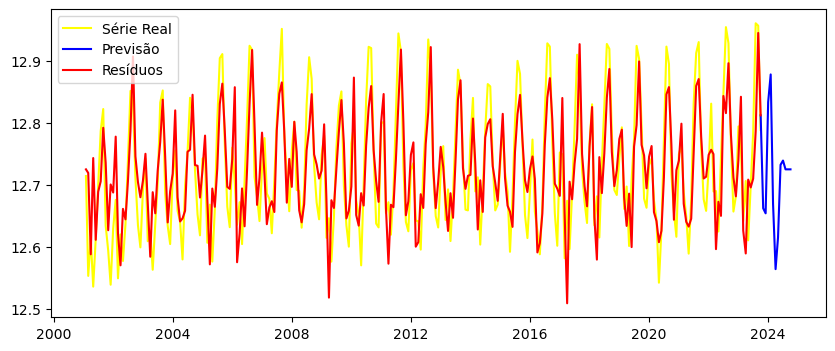

In [83]:
plt.plot(serie2,color='yellow', label='Série Real')
plt.plot(previsao_ma,color='blue', label='Previsão')
plt.plot(serie2-residuos_ma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Aparentemente a predição não fica boa, pouca amplitude dos dados. E conforme analisado nos resíduos não temos um modelo adequado para predizer os dados utilizando o Modelo de média Móvel (MA).

Retornando a Escala original da série.

Neste caso como retiramos a raiz vubica devemos elevar ao cubo a nossa série.

In [84]:
prev_escala_ma = pd.DataFrame(np.exp(previsao_ma))
prev_escala_ma

,predicted_mean
2023-09-30,366782.919015
2023-10-31,315610.755496
2023-11-30,313046.615308
2023-12-31,374693.477838
2024-01-31,391840.173898
2024-02-29,317870.997868
2024-03-31,286048.544812
2024-04-30,301065.543251
2024-05-31,338577.973625
2024-06-30,340918.826043


Concatenando a série original com a previsão encontrada.

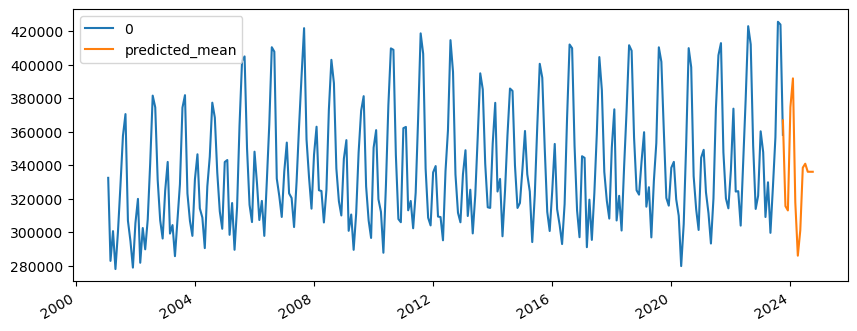

In [85]:
pd.concat([serie,prev_escala_ma]).plot();

Observe que essa predição cria uma linha no final, isso não é um bom sinal

## **Modelo ARMA**

Modelo Autoregressivo + Média Móvel

No modelo ARMA não incluímos nenhum parâmetro apenas para a diferenciação.

Modelo arima:(p,d,q)

*   p: ordem da autoregressão
*   d: grau de diferenciação (para transformar em estacionario)
*   q: Ordem de média móvel dos reísduos

Modelo arma: (p,0,q)

Melhor AIC: -811.726 = (10,0,0)

Modelo MA: AIC = -720.295 (0,0,9)

Nem sempre a combinação dos resultados encontrados anterioemnte será linear apra acharmos o modelo que minimiza o AIC no ARMA. Temos que verificar tambem se  tempo computacional não ficará muito elevado.

In [86]:
from statsmodels.tsa.arima.model import ARIMA

In [87]:
modelo_arma = ARIMA(serie2, order = (10,0,3))

In [88]:
resultado_arma = modelo_arma.fit()
print(resultado_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  273
Model:                ARIMA(10, 0, 3)   Log Likelihood                 489.007
Date:                Wed, 03 Jan 2024   AIC                           -948.014
Time:                        15:26:41   BIC                           -893.872
Sample:                    01-31-2001   HQIC                          -926.280
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7232      0.010   1211.778      0.000      12.703      12.744
ar.L1          0.7137      0.052     13.694      0.000       0.612       0.816
ar.L2          0.3507      0.071      4.954      0.0

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Observe que ele considerou o Modelo ARMA, ja desconsiderou o I de ARIMA. Uma vez que não incluimos e não se fez necessário valores para diferenciação.

Utilizando a combinação ARMA(9,0,8) teremos problemas de inversibilidade, problema da algébra linear onde os coeficiente MA não são invertíveis.

PAra evistar esse problema ao combinar modelo AR e MA devemos utilizar valores mais baixos para a ordem da média movel.


Melhor AIC: -811.726 = (10,0,0)

Modelo MA: AIC = -720.295 (0,0,9)

Modelo ARMA: Melhor AIC = -948.014 (10,0,3)

### **Análise dos Resíduos**

Analisando os resíduos do modelo criado

In [89]:
residuos_arma = resultado_arma.resid

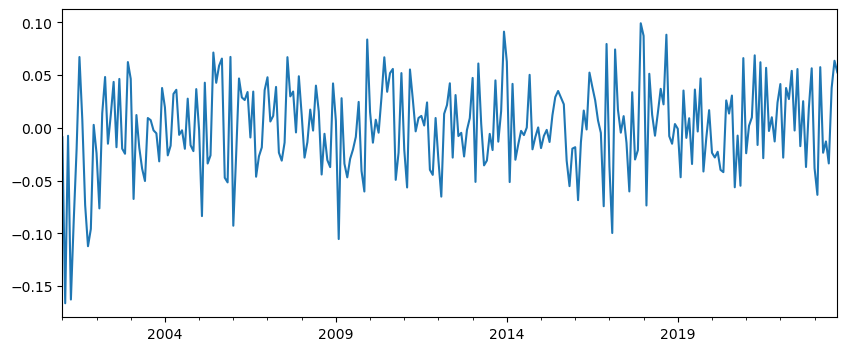

In [90]:
residuos_arma.plot()
plt.show()

A aprentemente a média é constante em torno de zero, porem existe alguns picos.

**Normalidade**

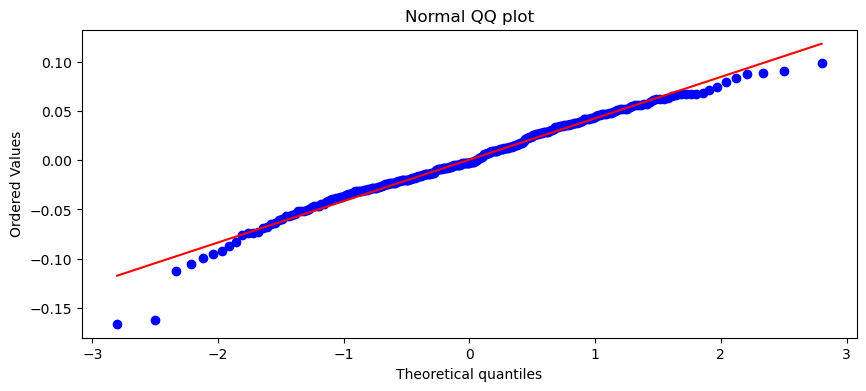

In [91]:
stats.probplot(residuos_arma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

A normalidade dos residuos comparada a graficos e modelos anteriores graficamete aprece mais proxim da linah de referência.

Testando a normalidade pelo teste estatístico de Shapiro-Wilk

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [92]:
e, p = stats.shapiro(residuos_arma)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9815285801887512
p-valor: 0.0013226172886788845


Ainda não temos uma distribuição normal.

C:\Users\lucas\AppData\Local\Temp\ipykernel_13980\146688118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos_arma);
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


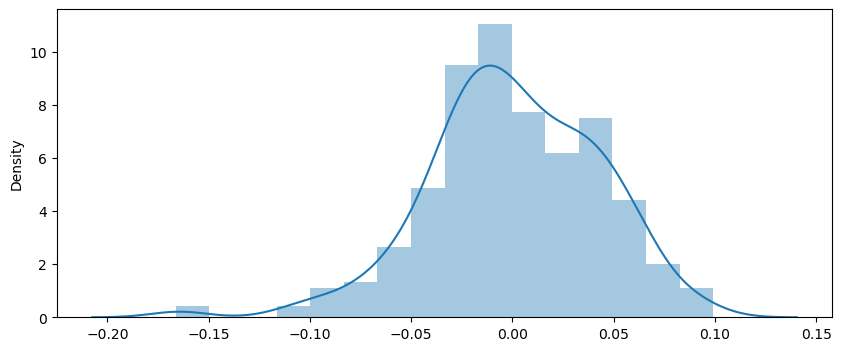

In [93]:
import seaborn as sns
sns.distplot(residuos_arma);

O histograma mostra uma leve assimetria dos dados. Porem visualmente essa distribuição está muito proxima da normalidade. Não tendo modelos melhores, poderíamos aceitar o ARMA.

**Autocorrelação**

Verificando se existe autocorrelação entre os resíduos.

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

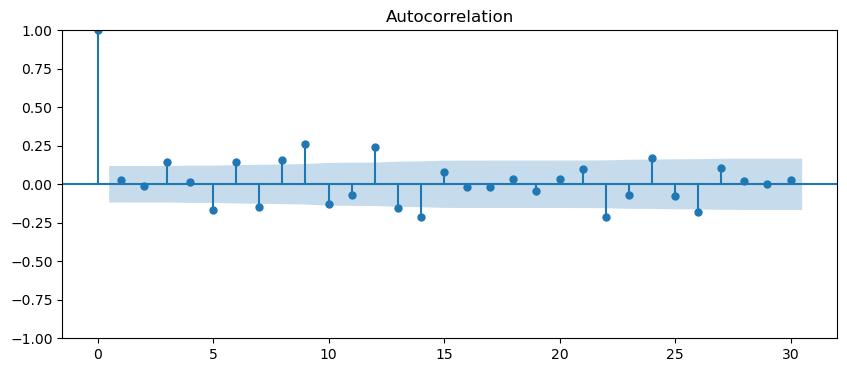

In [95]:
plot_acf(residuos_arma, lags=30)
plt.show()

Os resíduos não são autocorrelacionados, mas estão perto de ser, por apresentarem a maioria dos lags dentro do intervalo de confiança, mas alguns fora ainda

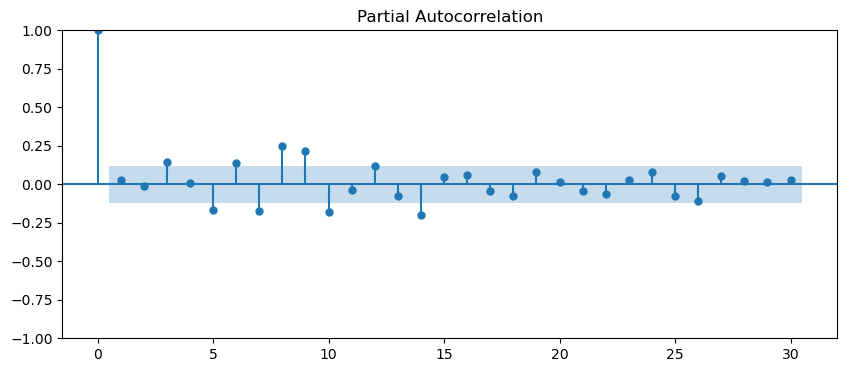

In [96]:
plot_pacf(residuos_arma, lags=30)
plt.show()

Verificando pelo grafico de correlação parcial temos que os resíduos não são autocorrelacionados, por apresentarem a maioria dos lags dentro do intervalo de confiança

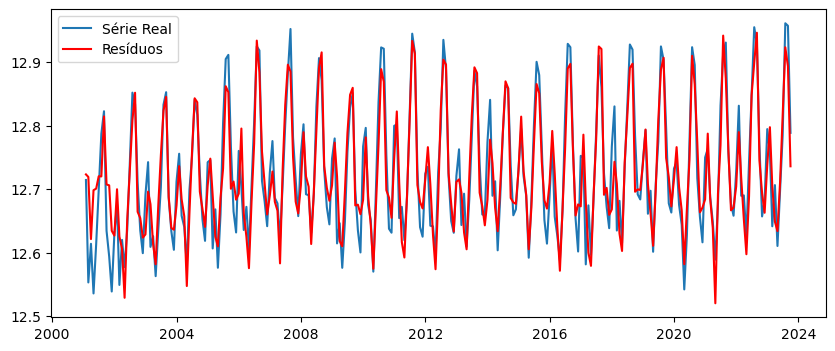

In [97]:
plt.plot(serie2, label='Série Real')
plt.plot(serie2-residuos_arma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Observe que nesse modelo a amplitude se ajustou melhor, e está bem proximo a série original.
Bem uniforme e proxima a série original.

**Previsão**

In [98]:
resultado_arma.fittedvalues

2001-01-31    12.723190
2001-02-28    12.719182
2001-03-31    12.621310
2001-04-30    12.698297
2001-05-31    12.700791
                ...    
2023-05-31    12.712099
2023-06-30    12.818234
2023-07-31    12.923404
2023-08-31    12.893644
2023-09-30    12.735980
Freq: M, Length: 273, dtype: float64

Valores ajustados encontrado pelo modelo.

Realizando a previsão para 12 meses.

In [99]:
previsao_arma = resultado_arma.predict(start=273, end=284)
previsao_arma

2023-10-31    12.726009
2023-11-30    12.690431
2023-12-31    12.731515
2024-01-31    12.766135
2024-02-29    12.722932
2024-03-31    12.696677
2024-04-30    12.575273
2024-05-31    12.682595
2024-06-30    12.796223
2024-07-31    12.914866
2024-08-31    12.902816
2024-09-30    12.794639
Freq: M, Name: predicted_mean, dtype: float64

Plotando o gráfico para previsão

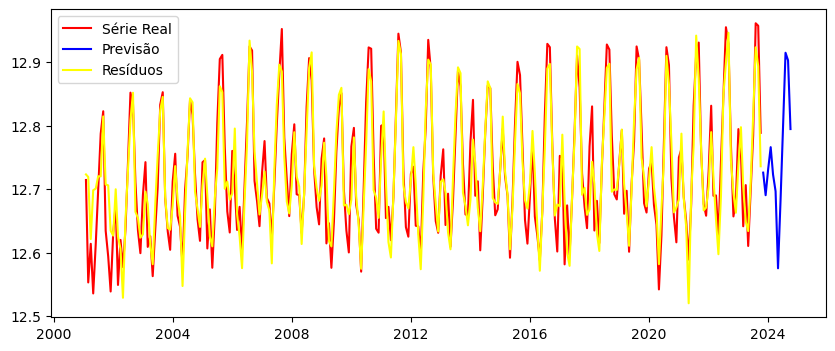

In [100]:
plt.plot(serie2,color='red', label='Série Real')
plt.plot(previsao_arma,color='blue', label='Previsão')
plt.plot(serie2-residuos_arma,color='yellow', label='Resíduos')
plt.legend(loc='best')
plt.show()

Revertendo a escala para voltar a original

In [101]:
prev_escala_arma = pd.DataFrame(np.exp(previsao_arma))
prev_escala_arma

,predicted_mean
2023-10-31,336383.965569
2023-11-30,324626.673451
2023-12-31,338241.491086
2024-01-31,350156.249554
2024-02-29,335350.525154
2024-03-31,326660.601211
2024-04-30,289315.495678
2024-05-31,322092.654117
2024-06-30,360851.959052
2024-07-31,406307.839831


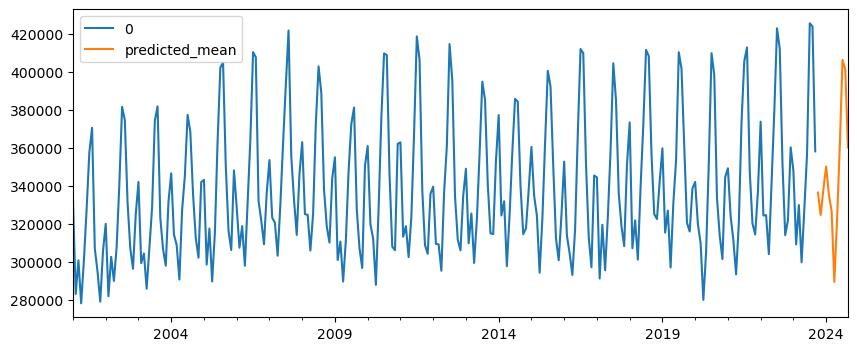

In [102]:
pd.concat([serie,prev_escala_arma]).plot();

Por ser muito íngreme, aparenta como se tivesse pulado alguns dados, quando na verdade é apenas a inclinação dos gráficos.

## **Modelo ARIMA**

Modelo ARIMA:(p,d,q)

Neste modelo utilizamos os três parâmetros

*   p: ordem da autoregressão
*   d: grau de diferenciação (para transformar em estacionario)
*   q: Ordem de média móvel dos reísduos


Melhor AIC: -811.726 = (10,0,0)

Modelo MA: AIC = -720.295 (0,0,9)

Modelo ARMA: Melhor AIC = -948.014 (10,0,3)

Para termos um modelo de ARIMA iremos colocar um valor para diferenciação mas na prática, não foi necessário realizar diferenciação, pois a serie ja era estacionária.

In [103]:
from statsmodels.tsa.arima.model import ARIMA

Vamos manter a configuração do ARMA e adicionar a diferenciação

Criando o modelo do ARIMA

In [104]:
modelo_arima = ARIMA(serie2, order = (10,1,2))

Verificando a saída do resumo do modelo

In [105]:
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  273
Model:                ARIMA(10, 1, 2)   Log Likelihood                 475.012
Date:                Wed, 03 Jan 2024   AIC                           -924.024
Time:                        15:26:43   BIC                           -877.149
Sample:                    01-31-2001   HQIC                          -905.205
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2142      0.073     -2.919      0.004      -0.358      -0.070
ar.L2         -0.4800      0.060     -7.999      0.000      -0.598      -0.362
ar.L3         -0.4976      0.059     -8.406      0.0

C:\Users\lucas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Melhor AIC: -811.726 = (10,0,0)

Modelo MA: AIC = -720.295 (0,0,9)

Modelo ARMA: Melhor AIC = -948.014 (10,0,3)

Modelo ARIMA: Melhor AIC = -924.024 (10,1,2)

### **Análise dos Resíduos**

Validar o modelo ARIMA - a partir da análise de resíduos

In [106]:
residuos_arima = resultado_arima.resid

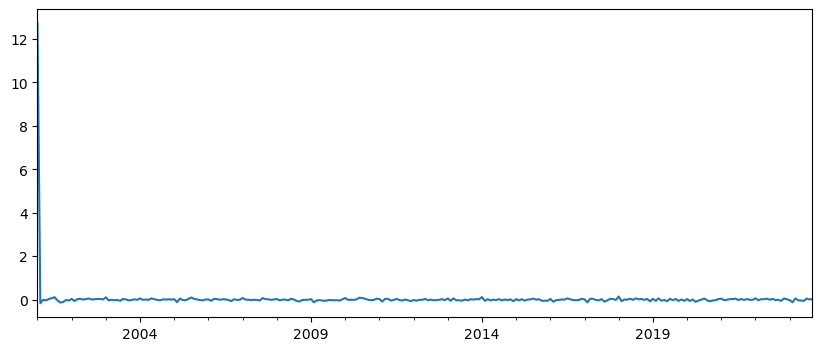

In [107]:
residuos_arima.plot()
plt.show()

Verificar se os residuos apresentam tendencia , se tem média contante em torno de zero e se a amplitude não está discrepante.

O ideal é que o resíduo seja um reído branco com media zero e variancia constante.



**Normalidade**

Analisando a normalidade dos resíduos

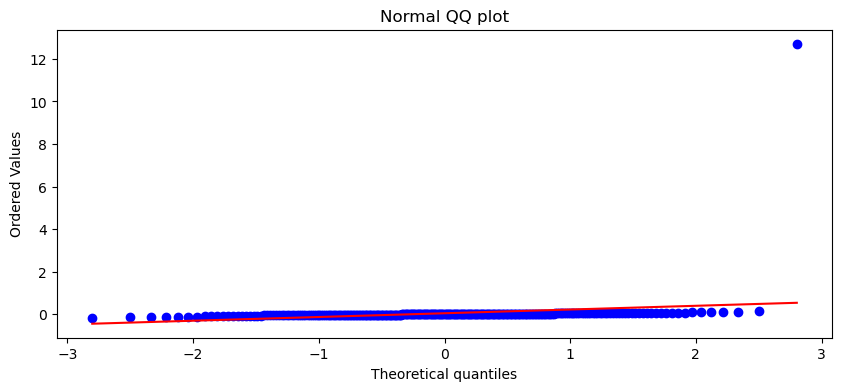

In [108]:
stats.probplot(residuos_arima, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

O Qq-plot, aparentemente não está ruim. No começo e no final da série apresentam dados um pouco dispersos.

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

A partir do teste numérico não temos normalidade nos resíduos.

In [109]:
e, p = stats.shapiro(residuos_arima)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.0577126145362854
p-valor: 1.6701468506287438e-34


C:\Users\lucas\AppData\Local\Temp\ipykernel_13980\1993979180.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos_arima);
C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


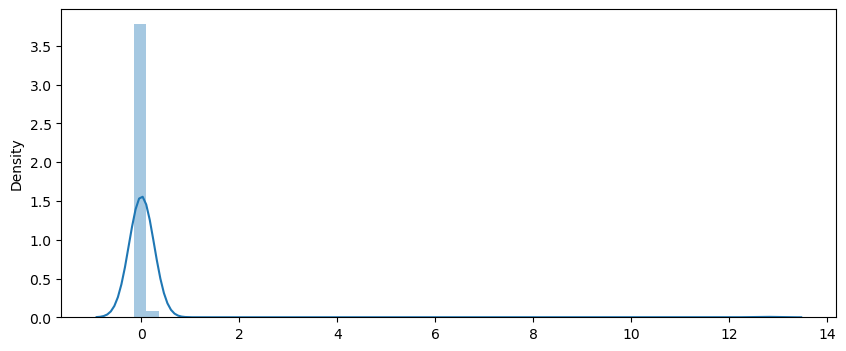

In [110]:
import seaborn as sns
sns.distplot(residuos_arima);

Na análise do histograma, para verificar a disposição da série observamos que sua distribuição aproxima de uma normal, visualmente, mas temos um outlier

**Autocorrelação**

Verificando a autocorrelação residual.

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

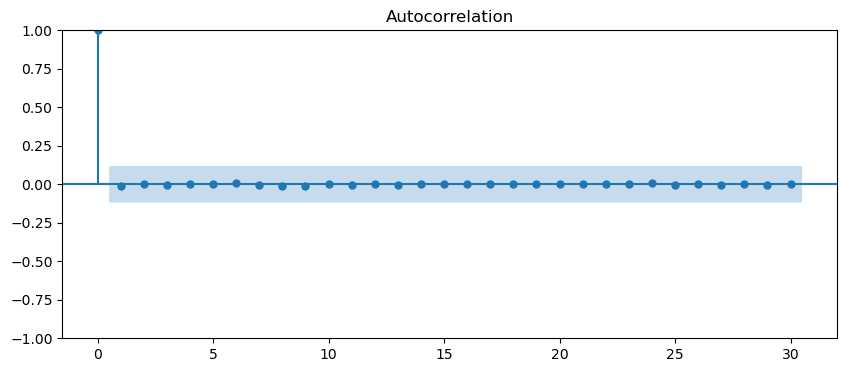

In [112]:
plot_acf(residuos_arima, lags=30)
plt.show()

A maioria dos lags estão dentro do intervalo de confiança, logo podemos dizer que pelo gráfico de autocorrelação os resíduals não são autocorrelacionados.

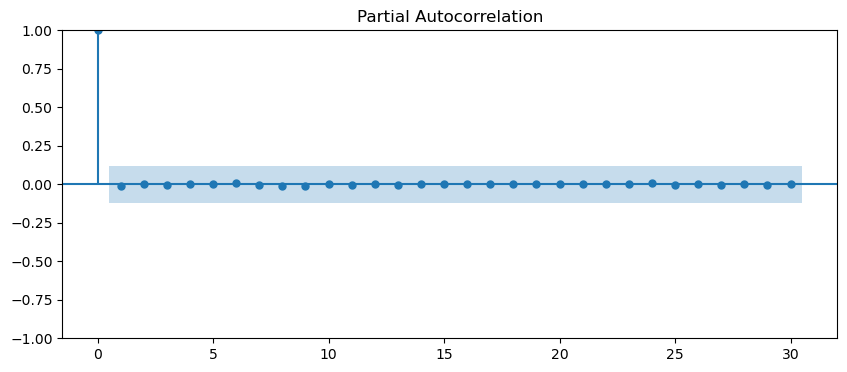

In [113]:
plot_pacf(residuos_arima, lags=30)
plt.show()

A partir da analise da autocorrelação parcial temos que a maioria dos lags estão dentro do intervalo de confiança, logo podemos que os resíduals não são autocorrelacionados.

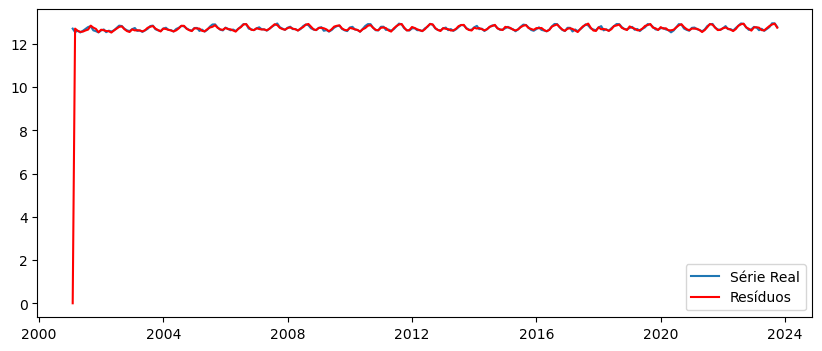

In [114]:
plt.plot(serie2, label='Série Real')
plt.plot(serie2-residuos_arima,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Plotando o grafico de resíduos e da série observamos que os resíduos estão adequados, dentro do que esperávamos. Ele consegue seguir as oscilações da série.

Observe que fazer a diferenciação ou não neste caso não irá alterar muito o modelo, pois ja temos uma série estacionária.

**Previsão**

Verificando os valores ajustados.

A série apresenta valores negativos pois realizamos a trasnformação e a diferenciação.

In [115]:
resultado_arima.fittedvalues

2001-01-31     0.000000
2001-02-28    12.714375
2001-03-31    12.611909
2001-04-30    12.564103
2001-05-31    12.576146
                ...    
2023-05-31    12.734227
2023-06-30    12.833948
2023-07-31    12.904630
2023-08-31    12.943306
2023-09-30    12.756673
Freq: M, Length: 273, dtype: float64

In [116]:
previsao_arima = resultado_arima.predict(start=272, end=284)
previsao_arima

2023-09-30    12.756673
2023-10-31    12.696986
2023-11-30    12.684157
2023-12-31    12.808251
2024-01-31    12.719991
2024-02-29    12.713719
2024-03-31    12.655660
2024-04-30    12.636080
2024-05-31    12.704696
2024-06-30    12.773559
2024-07-31    12.965528
2024-08-31    12.919477
2024-09-30    12.820456
Freq: M, Name: predicted_mean, dtype: float64

Temos que fazer uma transformação de dados - utilizando o predict isso daria mais trabalho pois não realiza a inversão da diferenciação de maneira automática.

Fazendo a previsão utilizando o método forecast -> ja resolve o problema da diferenciação

In [117]:
previsao_arima2 = resultado_arima.forecast(12)
previsao_arima2

2023-10-31    12.696986
2023-11-30    12.684157
2023-12-31    12.808251
2024-01-31    12.719991
2024-02-29    12.713719
2024-03-31    12.655660
2024-04-30    12.636080
2024-05-31    12.704696
2024-06-30    12.773559
2024-07-31    12.965528
2024-08-31    12.919477
2024-09-30    12.820456
Freq: M, Name: predicted_mean, dtype: float64

Revertendo o log

In [118]:
prev_escala_arima = pd.DataFrame(np.exp(previsao_arima2))
prev_escala_arima

,predicted_mean
2023-10-31,326761.566240
2023-11-30,322596.267568
2023-12-31,365218.571131
2024-01-31,334365.983173
2024-02-29,332275.220367
2024-03-31,313533.150759
2024-04-30,307453.685612
2024-05-31,329290.689439
2024-06-30,352765.560025
2024-07-31,427422.256030


Observe que não temos as datas com essa função.

Concatenando a série original com a previsão do arima

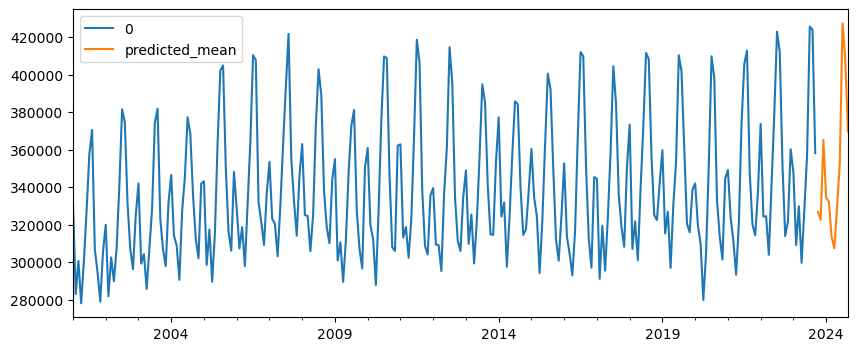

In [119]:
pd.concat([serie,prev_escala_arima]).plot();

Aparentemente obtemos uma boa previsão, com uma boa amplitude. O mesmo acontece aqui, o corte realizado no gráfico é devido ele ser íngreme

## **Modelo AUTO ARIMA**

Realiza todas as comparações de modelo e retorna o melhor modelo.

A função autoarima inclui a sazonalidade.

Na nossa série aparentemente temos uma sazonalidade bem definida.

Modelo arima:(p,d,q)

*   p: ordem da autoregressão
*   d: grau de diferenciação (para transformar em estacionario)
*   q: Ordem de média móvel dos reísduos


Melhor AIC: -811.726 = (10,0,0)

Modelo MA: AIC = -720.295 (0,0,9)

Modelo ARMA: Melhor AIC = -948.014 (10,0,3)

Modelo ARIMA: Melhor AIC = -924.024 (10,1,2)

In [120]:
!pip install pmdarima

In [121]:
from pmdarima.arima import auto_arima

Criando modelo utilizando o autoarima.

Parâmetros:
*   Trace: Apresenta a lista de modelos testados
*   Stepwise: Seleção gradual do modelo "ideal", é um processo mais rápido porém menos minuncioso.
*   Seasonal: analisar a sazonalidade ou não
*   Parametros máximos a serem analidados SARIMA (p,d,q)(P,D,Q) -> interessante dobrar o default
*   M: período sazonal, no nosso caso é mensal.

In [ ]:
modelo_auto = auto_arima(serie2, trace = True, stepwise = False, seasonal=True, max_p=10, max_q=10,
                          max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0, m=12,)

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-514.927, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-711.575, Time=0.21 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=-804.977, Time=0.55 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=-847.385, Time=1.46 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=-888.197, Time=4.76 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-1040.610, Time=0.64 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=-1066.909, Time=2.57 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=inf, Time=5.44 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-1066.849, Time=1.01 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=-1060.561, Time=2.91 sec
 ARIMA(0,1,0)(3,0,0)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(3,0,1)[

Encontramos o modelo com melhor AIC facilmente utilizando:

In [ ]:
print(modelo_auto.aic())

Melhor AIC: -811.726 = (10,0,0)

Modelo MA: AIC = -720.295 (0,0,9)

Modelo ARMA: Melhor AIC = -948.014 (10,0,3)

Modelo ARIMA: Melhor AIC = -924.024 (10,1,2)

Modelo_AUTOARIMA: AIC=-1121.394 ARIMA(0,1,1)(1,0,1)

Fazendo o ajuste utilizando o modelo autoarima

In [ ]:
resultado_auto = modelo_auto.fit(serie2)
print(resultado_auto.summary())

O reusltado do autoarima é o melhor modelo pelo AIC.

### **Análise dos Resíduos**

Realizando a análise de residuos do modelo gerado pelo autoarima.

Observe que a função de analise de residuos é diferente pois estamos utilizando outra biblioteca.

In [ ]:
residuos_auto = resultado_auto.resid

Plotando os residuos

Aparentemente temos uma média constante (não há tendencia)
Variância não se amntém contante, amplitude varia




In [ ]:
plt.plot(residuos_auto())
plt.show()

**Normalidade**

In [ ]:
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Realizando o teste de normalidade para os residuos, observamos que os dados iniciais e finais se afastam um pouco da linha de referência.


**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [ ]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

O p-valor é < que 0,05 indicando que a distribuição não é normal. O primeiro valor residual também ajuda a diminuir bastante o p-valor

In [ ]:
import seaborn as sns
sns.distplot(residuos_auto());

Temos um pico na distribuição, porem os dados se aproximam de uma normalidade

**Autocorrelação**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(residuos_auto(), lags=30)
plt.show()

Existem lags que saem  do intervalo de confiaça, porem a maioria fica dentro do intervalo. logo não há autocorrelação nos resíduos

In [ ]:
plot_pacf(residuos_auto(), lags=30)
plt.show()

Para analise de correlação parcial temos o mesmo, existem lags que saem  do intervalo de confiaça, porem a maioria fica dentro do intervalo. logo não há autocorrelação nos resíduos

In [ ]:
plt.plot(serie2, label='Série Real')
plt.plot(serie2-residuos_auto(),color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

plotando a sére com os resíduos, observamo que em geral seguem bem os dados , porem no início temos uma pequena diferença.

**Previsão**

Fazendo a previsão de 12 meses.

In [ ]:
previsao_auto = resultado_auto.predict(n_periods=12)
previsao_auto

Transformando os dados , retornando a escala inicial -> retirar o log

In [ ]:
prev_escala_auto = pd.DataFrame(np.exp(previsao_auto), columns=['Previsão_SARIMA'])
prev_escala_auto

In [ ]:
pd.concat([serie,prev_escala_auto]).plot();

A previsão consegue seguir o padrão da série. O mesmo acontece devido a inclinação da série, mas parece seguir bem o padrão.

## **Análise final do projeto**

Para comparar o modelo utilizamos a métrica AIC

**COMPARAÇÃO DOS MODELOS**

Melhor AIC: -811.726 = (10,0,0)

Modelo MA: AIC = -720.295 (0,0,9)

Modelo ARMA: Melhor AIC = -948.014 (10,0,3)

Modelo ARIMA: Melhor AIC = -924.024 (10,1,2)

**Modelo_SARIMA (AutoArima): AIC=-1121.394 ARIMA(0,1,1)(1,0,1)**

**DESEMPENHO DOS MODELOS**

Para verificar o desempenho dos modelos vamso utilizar:


*   ERRO MÉDIO ABSOLUTO (MAE)
*   RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)



Vamos realizar a comparação utilizando os meses de 2023, que foram separados inicialmente.

Criando uma lista apra os valores reais

In [ ]:
serie

In [ ]:
lista = [356672.3849, 425611.3284, 423934.2574, 358136.2599]
valores_reais = pd.DataFrame(lista, columns = ['valores reais'])
print(valores_reais)

Os 4 primeiros valores previstos de cada modelo, observe que alguns colocamos para iniciar em dezembro e outros em janeiro.

In [ ]:
auto = prev_escala_auto.iloc[0:4]
ar = prev_escala.iloc[1:5]
ma = prev_escala_ma.iloc[1:5]
arima = prev_escala_arima.iloc[0:4]
arma = prev_escala_arma.iloc[1:5]


In [ ]:
auto

In [ ]:
ar

Excluindo índice para os que estavam com datas

In [ ]:
pd.DataFrame.reset_index(ar, drop=True, inplace=True)
pd.DataFrame.reset_index(ma, drop=True, inplace=True)
pd.DataFrame.reset_index(arma, drop=True, inplace=True)
pd.DataFrame.reset_index(auto, drop=True, inplace=True)
pd.DataFrame.reset_index(arima, drop=True, inplace=True)

Criando um dataframe para concatenar os valores reais e a predição do autoarima

In [ ]:
desempenho = pd.concat([valores_reais, auto, ar, ma, arma, arima],axis=1)
desempenho

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

**ERRO MÉDIO ABSOLUTO (MAE)**

In [ ]:
print('ERRO MÉDIO ABSOLUTO (MAE)')
mae_sarima = mean_absolute_error(desempenho['valores reais'], desempenho.iloc[:, 1])
print('SARIMA: {:.2f}'.format(mae_sarima))
mae_ar = mean_absolute_error(desempenho['valores reais'], desempenho.iloc[:, 2])
print('AR: {:.2f}'.format(mae_ar))
mae_ma = mean_absolute_error(desempenho['valores reais'], desempenho.iloc[:, 3])
print('MA: {:.2f}'.format(mae_ma))
mae_arma = mean_absolute_error(desempenho['valores reais'], desempenho.iloc[:, 4])
print('ARMA: {:.2f}'.format(mae_arma))
mae_arima = mean_absolute_error(desempenho['valores reais'], desempenho.iloc[:, 5])
print('ARIMA: {:.2f}'.format(mae_arima))

**ERRO QUADRÁTICO MÉDIO (MSE)**

In [ ]:
print('ERRO QUADRÁTICO MÉDIO (MSE)')
mse_sarima = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 1])
print('SARIMA: {:.2f}'.format(mse_sarima))
mse_ar = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 2])
print('AR: {:.2f}'.format(mse_ar))
mse_ma = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 3])
print('MA: {:.2f}'.format(mse_ma))
mse_arma = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 4])
print('ARMA: {:.2f}'.format(mse_arma))
mse_arima = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 5])
print('ARIMA: {:.2f}'.format(mse_arima))

**RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)**

In [ ]:
print('RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)')
rmse_sarima = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 1], squared=False)
print('SARIMA: {:.2f}'.format(rmse_sarima))
rmse_ar = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 2], squared=False)
print('AR: {:.2f}'.format(rmse_ar))
rmse_ma = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 3], squared=False)
print('MA: {:.2f}'.format(rmse_ma))
rmse_arma = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 4], squared=False)
print('ARMA: {:.2f}'.format(rmse_arma))
rmse_arima = mean_squared_error(desempenho['valores reais'], desempenho.iloc[:, 5], squared=False)
print('ARIMA: {:.2f}'.format(rmse_arima))

Apesar do erro quadrático do SARIMA não ser o melhor, foi visto que a sua previsão é a que mais segue graficamente o padrão.

# Predição de geração de energia nuclear

Vamos agora utilizar o auto arima para predizer os dados de energia nucler, mas antes precisamos tratar os dados

In [ ]:
eletricidade.head()

In [ ]:
eletricidade_nuclear = eletricidade.copy()[['Month', 'nuclear thousand megawatthours']]
eletricidade_nuclear.columns = ['mes', 'nuclear']
eletricidade_nuclear.shape

In [ ]:
eletricidade_nuclear.head()

In [ ]:
eletricidade_nuclear.dtypes

In [ ]:
mesInvertido = eletricidade_nuclear['mes'][::-1]
combustivelInvertido = eletricidade_nuclear['nuclear'][::-1]
eletricidade_ordenada = pd.DataFrame(data=[mesInvertido, combustivelInvertido]).T
eletricidade_ordenada.head()

In [ ]:
eletricidade2 = eletricidade_ordenada.drop(columns='mes')
eletricidade2.head()

In [ ]:
eletricidade3 = eletricidade2.values
eletricidade3

In [ ]:
eletricidade4 = list(eletricidade3.flatten())
print(eletricidade4)

In [ ]:
indice = pd.date_range('2001', periods = len(eletricidade4), freq = 'M')
indice

In [ ]:
serie = pd.Series(eletricidade4, index = indice)
serie

In [ ]:
serie.plot()
plt.show()

Calculando a média móvel para suavização da série.

*   Utilizando janela de 12 meses
*   Retiramos a média dessa janela

In [ ]:
media_movel = serie.rolling(window=12)
media_movel = media_movel.mean()
plt.plot(media_movel);

In [ ]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel,color='red', label='Média Móvel 12 meses')
plt.legend(loc='best')
plt.show()


Existe oscilação na média móvel, porémbemo mais suave do que da série real.  (redução de amplitude)

**Decomposição**

Iremos realizar a decomposição da série para analisarmos a tendencia, sazonalidade e resíduos

In [ ]:
decomposicao = seasonal_decompose(serie)
decomposicao.plot()

No primeiro gráfico temos a série temporal real.

No segundo a tendencia, que evidencia um pouco de tendência, mas não muito. Existe uma oscilação porém não é possível identificar um ciclo bem definido.

No terceiro a sazonalidade forte e constante , os picos não aumentam nem diminuem, eles se matem constantes ao longo da série, e com intervalos bem definidos, mas também com subpicos.

E no quarto gráfico podemos observar os resíduos que estão aparentemente aleatórios em torno de zero.

### **Normalidade e Transformação**

In [ ]:
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Podemos verificar que os dados não se aproximam de uma distribuição normal, apenas alguns pontos estão proximos da linha de referencia.
E alguns pontos principalmente no início e fim da série estão bem distantes da linha de referência.

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [ ]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Vamos tentar aproximar de uma distribuição normal

Inicialmente iremos realizar uma tranformação Transformação por log, buscando diminuir variância e melhorar normalidade.

In [ ]:
serie2 = np.log(serie)
serie2

In [ ]:
e, p = stats.shapiro(serie2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

In [ ]:
stats.probplot(serie2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

A função logarítimica não apresentou erro, portanto seguiremos com ela, já que não possuimos valores zeros ou negativos.
Ainda não temos uma série normal e os dados ainda estão distantes da linha.

In [ ]:
sns.distplot(serie);

In [ ]:
sns.distplot(serie2);

Observamos que a série melhora muito pouco sua disposição, e se aproxima mais da normalidade.

Sempre temos que buscar uma série que aproxima de uma distribuição normal para termos modelos melhores.

### **Estacionaridade**

In [ ]:
kpss = statsmodels.tsa.stattools.kpss(serie2)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

### **Autocorrelação**

In [ ]:
plot_acf(serie2, lags=20)
plt.show()

In [ ]:
plot_pacf(serie, lags=20)
plt.show()

A série é autocorrelacionada, mas não tem problema, pois esse é um pressuposto da análise de modelos de séries temporais.

## **Modelo AUTO ARIMA**

In [ ]:
modelo_auto = auto_arima(serie2, trace = True, stepwise = False, seasonal=True, max_p=10, max_q=10,
                          max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0, m=12,)

In [ ]:
print(modelo_auto.aic())

In [ ]:
resultado_auto = modelo_auto.fit(serie2)
print(resultado_auto.summary())

### **Análise dos Resíduos**

In [ ]:
residuos_auto = resultado_auto.resid
plt.plot(residuos_auto())
plt.show()


**Normalidade**

In [ ]:
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Realizando o teste de normalidade para os residuos, observamos que os dados iniciais e finais se afastam um pouco da linha de referência.

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [ ]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

In [ ]:
sns.distplot(residuos_auto());

**Autocorrelação**

In [ ]:
plot_acf(residuos_auto(), lags=30)
plt.show()


In [ ]:
plot_pacf(residuos_auto(), lags=30)
plt.show()

In [ ]:
plt.plot(serie2, label='Série Real')
plt.plot(serie2-residuos_auto(),color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [ ]:
previsao_auto = resultado_auto.predict(n_periods=12)
previsao_auto

In [ ]:
prev_escala_auto = pd.DataFrame(np.exp(previsao_auto), columns=['Previsão_SARIMA'])
prev_escala_auto

In [ ]:
pd.concat([serie,prev_escala_auto]).plot();

Percebe-se que a previsão até que segue os picos e que o AIC é de -1065.526